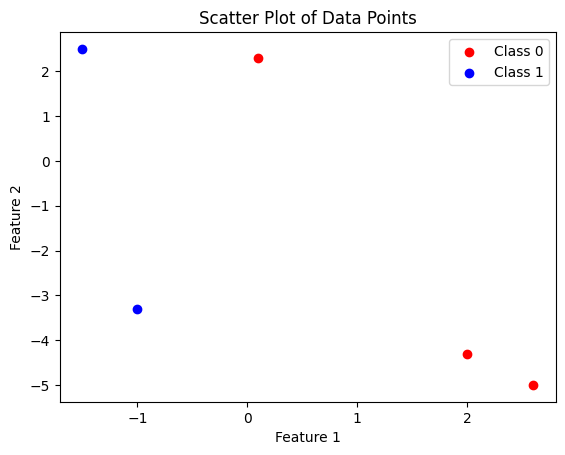

In [9]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data points
X = [[0.1, 2.3], [-1.5, 2.5], [2.0, -4.3], [2.6, -5], [-1.0, -3.3]]
y = [0, 1, 0, 0, 1]

# Separate data points by class
class_0 = [X[i] for i in range(len(X)) if y[i] == 0]
class_1 = [X[i] for i in range(len(X)) if y[i] == 1]

# Plot the data points
plt.scatter([x[0] for x in class_0], [x[1] for x in class_0], color='red', label='Class 0')
plt.scatter([x[0] for x in class_1], [x[1] for x in class_1], color='blue', label='Class 1')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Data Points')

# Add legend
plt.legend()

# Show the plot
plt.show()

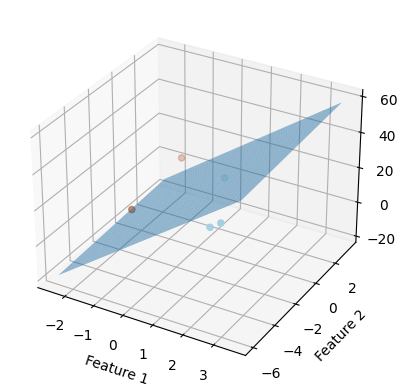

In [10]:
''' Generate the transformed features For example, if we consider the first data point [0.1, 2.3],
the transformed feature will be (0.1, 2.3, 0.1 ** 2 + 2.3 ** 2) = (0.1, 2.3, 5.3).
Similarly, the other data points will have their respective transformed features.'''
fX = [(x[0], x[1], x[0] ** 2 + x[1] ** 2) for x in X]

# Train SVM model
model = svm.SVC(kernel='linear')
model.fit(fX, y)

# Create a meshgrid of points to plot the hyperplane
x_min, x_max = np.min(fX, axis=0)[0] - 1, np.max(fX, axis=0)[0] + 1
y_min, y_max = np.min(fX, axis=0)[1] - 1, np.max(fX, axis=0)[1] + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
zz = (-model.intercept_[0] - model.coef_[0][0] * xx - model.coef_[0][1] * yy) / model.coef_[0][2]

# Plot the data points and the hyperplane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter([x[0] for x in fX], [x[1] for x in fX], [x[2] for x in fX], c=y, cmap=plt.cm.Paired)
ax.plot_surface(xx, yy, zz, alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')

plt.show()

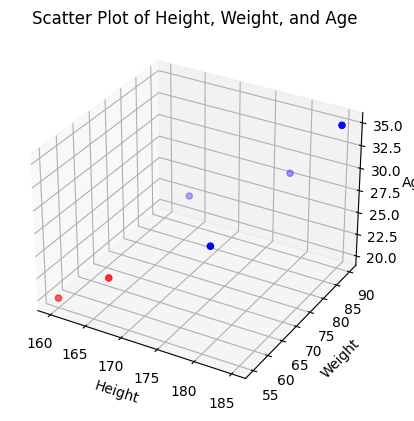

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [11]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Step 2: Load and preprocess the dataset
data = {
    'Height': [175, 180, 160, 165, 185, 170],
    'Weight': [70, 85, 55, 60, 90, 75],
    'Age': [25, 30, 20, 22, 35, 28],
    'Gender': ['Male', 'Male', 'Female', 'Female', 'Male', 'Male']
}

# Separate the data
X = data['Height']
Y = data['Weight']
Z = data['Age']
colors = ['blue' if g == 'Male' else 'red' for g in data['Gender']]

# Plot the data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=colors)

# Set labels and title
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Age')
ax.set_title('Scatter Plot of Height, Weight, and Age')

# Show the plot
plt.show()
df = pd.DataFrame(data)

# Convert gender labels to numerical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Split the dataset into features (X) and labels (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

# Step 4: Choose an appropriate kernel function
# In this case, we will try the linear kernel
kernel = 'linear'

# Step 5: Train the SVM model
model = SVC(kernel=kernel)
model.fit(X, y)

# Step 6: Evaluate the model
y_pred = model.predict(X)
print(classification_report(y, y_pred))